# Analyse der aufbereiteten Daten von Daniel

## Übersicht:
* Einlesen von Packages und setzen von Variablen / Funktionen
* Daten einlesen und erste Übersicht erzeugen
* Verteilungsanalyse
* Zeitliche Analyse


## Einlesen von Packages und setzen von Variablen / Funktionen

In [1]:
from datetime import date

import pandas as pd
import numpy as np

import pandas_profiling as pd_profil

import functions as fu
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

# Pfade setzen
c_fold = fu.get_folder()
p_fold = c_fold + '\data\Prepared'
folder = c_fold + '\data\Processed\Zyklus'
folder_final = c_fold + '\data\Processed\\final'

## Daten einlesen und erste Übersicht erzeugen

In [2]:
df = pd.read_csv(f"{folder_final}\\df_fertige_features.csv", sep=',')

profile = pd_profil.ProfileReport(df)

datum = date.today().strftime("%Y_%m_%d")

profile.to_file(f"{c_fold}\\models\\zyklus_aggregiert_explorationreport_{datum}.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\danie\OneDrive\Dokumente\_Programmierung\python_workspaces\Uni_Master\battery_failure_predictions\batfailpred\lib\site-packages\scipy\stats\stats.py:4812: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Analyse der Feature Correlations

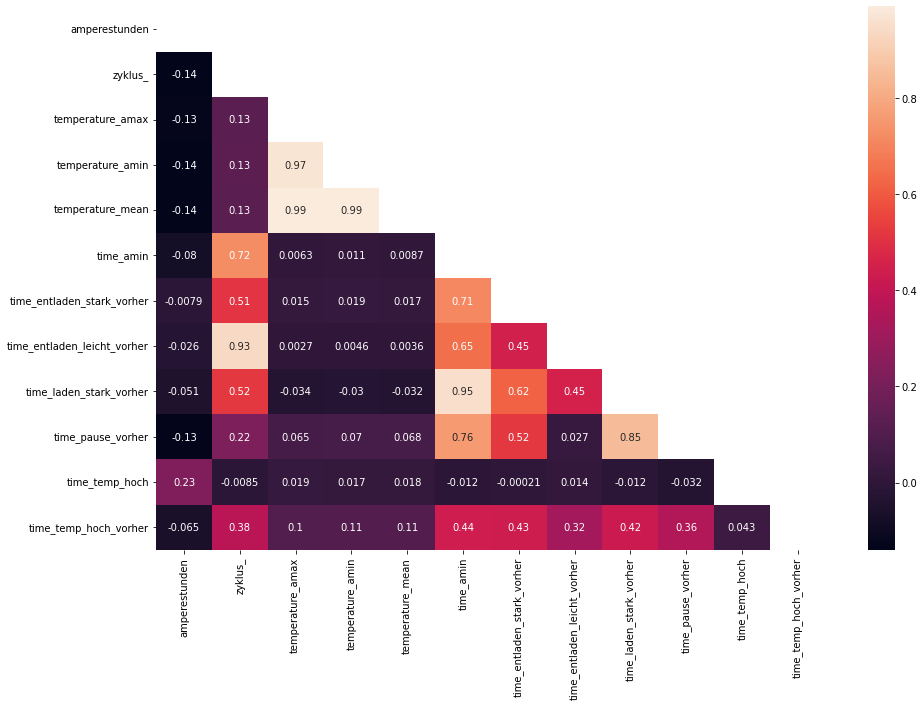

In [3]:
df = df[df.type_ == 'D']

data = df

corrMatrix = data.corr()
mask = np.triu(np.ones_like(corrMatrix, dtype=bool))


plt.figure(figsize=(15,10))
sns.heatmap(corrMatrix, annot=True,mask=mask)
plt.draw()

In [38]:
df.head()

,batteryname_,amperestunden,zyklus_,comment_,type_,temperature_amax,temperature_amin,temperature_mean,time_amin,time_entladen_stark_vorher,time_entladen_leicht_vorher,time_laden_stark_vorher,time_pause_vorher,time_temp_hoch,time_temp_hoch_vorher
0,RW1,2.094997,0,low current discharge at 0.04A,D,18.79972,17.08313,17.939268,1538.07,0.0,188976.68,0.00,0.0,0.0,0.0
3,RW1,2.000364,3,reference discharge,D,23.56742,18.39025,21.798768,385232.92,0.0,196178.50,194718.28,0.0,0.0,0.0
5,RW1,2.000250,5,reference discharge,D,24.06639,18.15403,21.449898,405533.19,0.0,203379.98,207816.73,0.0,0.0,0.0
7,RW1,0.166649,7,pulsed load (discharge),D,19.83912,18.23277,19.234778,426923.66,0.0,203979.98,207816.73,1200.0,0.0,0.0
9,RW1,0.166652,9,pulsed load (discharge),D,20.97899,19.24067,20.080216,428723.66,0.0,204579.98,207816.73,2400.0,0.0,0.0


## Analyse der Zeitlichen Verläufe je Battery

* Es gibt 3 unterschiedliche Verläufe von Battery Lebenszyklen 

<AxesSubplot:xlabel='zyklus_', ylabel='amperestunden'>

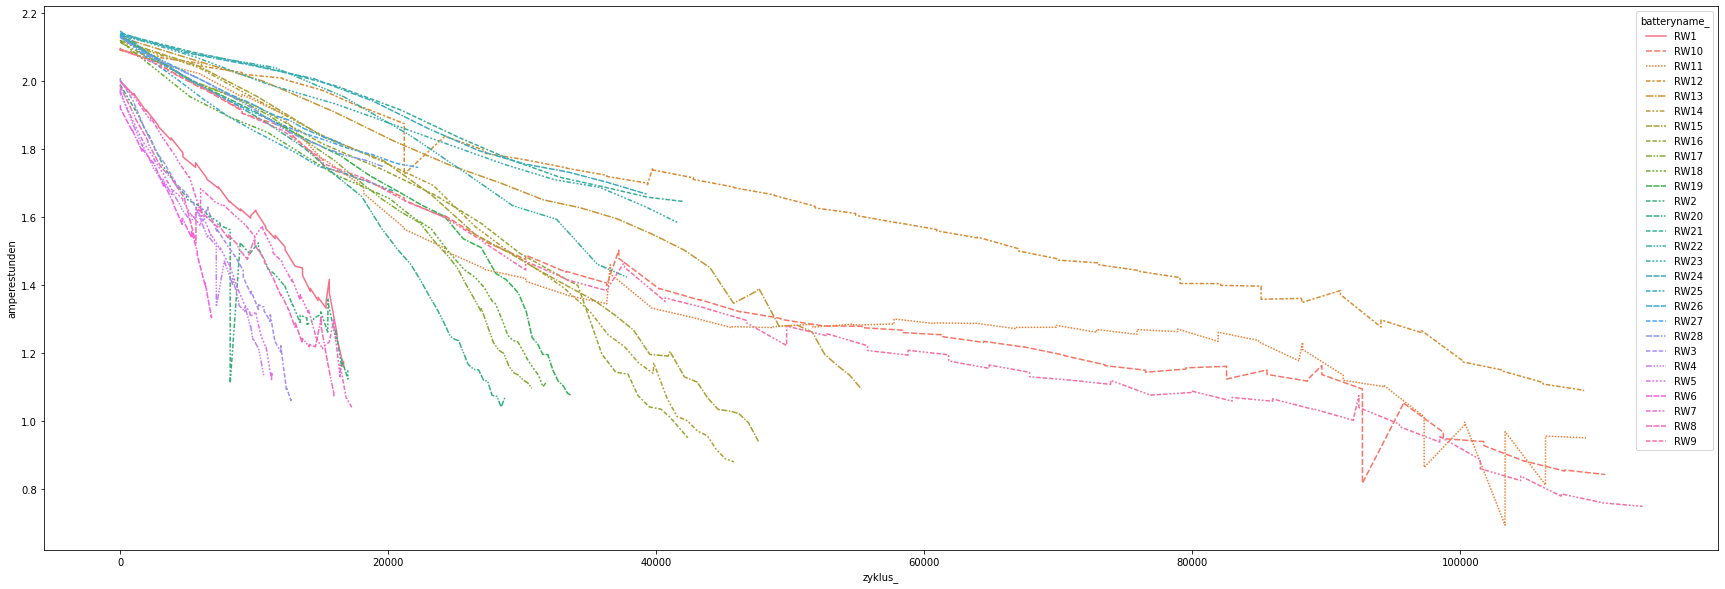

In [4]:
df = df[df.comment_ == 'reference discharge']
plt.figure(figsize=(30,10))
sns.lineplot(data=df,x='zyklus_', y='amperestunden', hue='batteryname_', style='batteryname_')

In [34]:
df.shape

(423810, 14)